# Evaluating Graph Embeddings in Minkowski Spacetime<br>

We now attempt to apply this DAG embedding algorithm on real data, beginning with a few synthetic datasets: causal set graphs, uniformly scattered interval graphs, and Random DAGs. <br>

Finally, we apply the embedding to real world citation networks, such as the collection of directed citations existing between published scientific papers, as well as the network of citations documented between legal cases in the Supreme Court of the United States (SCOTUS).

In [6]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
# plotting style
%matplotlib inline
plt.style.use('seaborn')
# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";
# ignore warnings
import warnings
warnings.filterwarnings('ignore');

### Visualizing causal sets & DAGs in Minkowski space

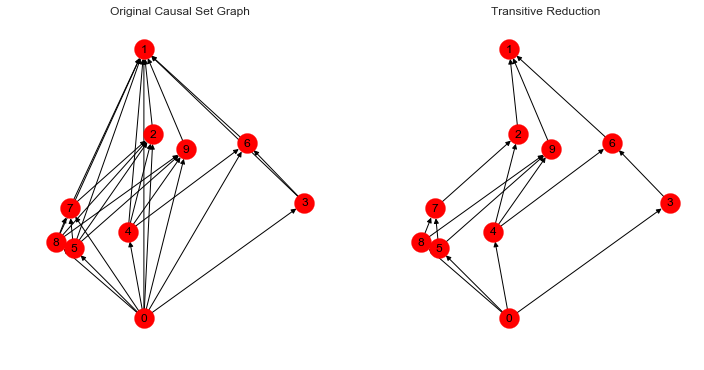

In [4]:
from sample_graphs import causal_set_graph, uniform_box_graph
from eval_metrics import add_edges, roc_auc_score, plot_roc_curve, sensitivity, specificity
from dag_embed import MinkowskiEmbedding

# plot causal set graph & transitive reduction
N = 10
G = causal_set_graph(N, 2)
options = {'node_size': 400,
           'width': 1,
           'with_labels': True}
draw_pos = {i:G.node[i]['position'][::-1] for i in range(N)}
trans_G = nx.transitive_reduction(G)
plt.figure(figsize=(12, 6))
plt.subplot(121)
nx.draw(G, pos=draw_pos, **options)
plt.title('Original Causal Set Graph')
plt.subplot(122)
plt.title('Transitive Reduction')
nx.draw(trans_G, pos=draw_pos, **options);

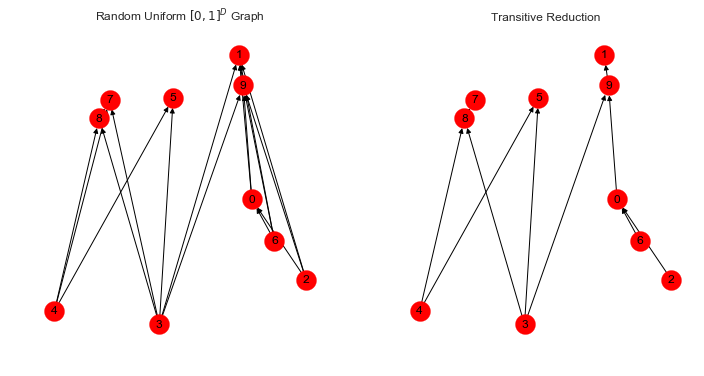

In [5]:
# plot uniform rectangle graph and transitive reduction
N = 10
G = uniform_box_graph(N, 2)
draw_pos = {i:G.node[i]['position'][::-1] for i in range(N)}
trans_G = nx.transitive_reduction(G)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title(r'Random Uniform $[0,1]^D$ Graph')
nx.draw(G, pos=draw_pos, **options)
plt.subplot(122)
plt.title('Transitive Reduction')
nx.draw(trans_G, pos=draw_pos, **options);

## Ex 1.) Minkowski Embedding with causal set graphs

Note: how to handle embeddings where time direction is reversed?

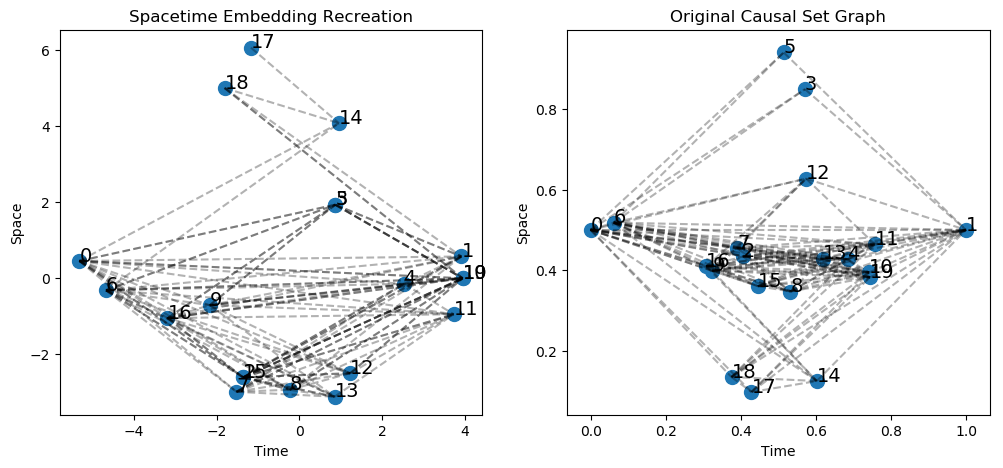

In [10]:
# evaluate on causal set graph
from dag_embed import MinkowskiEmbedding
N = 20
G = causal_set_graph(N, 2)
embed = MinkowskiEmbedding(n_components=2) 
X = embed.fit(G)
plt.figure(figsize=(12,5))
plt.style.use('default')
plt.subplot(121)
plt.title('Spacetime Embedding Recreation')
plt.xlabel('Time')
plt.ylabel('Space')
plt.scatter(X[:, 0], X[:, 1], s=100)
for i in range(N):
    _ = plt.text(X[i, 0], X[i, 1], str(i), size=14);
for u,v in add_edges(X):
    _ = plt.plot([X[u][0], X[v][0]], [X[u][1], X[v][1]], c='black', linestyle='--', alpha=0.3);
plt.subplot(122)
plt.title('Original Causal Set Graph')
plt.xlabel('Time')
plt.ylabel('Space')
X_orig = np.array([G.node[i]['position'] for i in range(N)])
plt.scatter(X_orig[:, 0], X_orig[:, 1], s=100)
for i in range(N):
    _ = plt.text(X_orig[i, 0], X_orig[i, 1], str(i), size=14);
for u,v in list(G.edges()):
    _ = plt.plot([X_orig[u][0], X_orig[v][0]], [X_orig[u][1], X_orig[v][1]], 
                 alpha=0.3, c='black', linestyle='--');
plt.show();

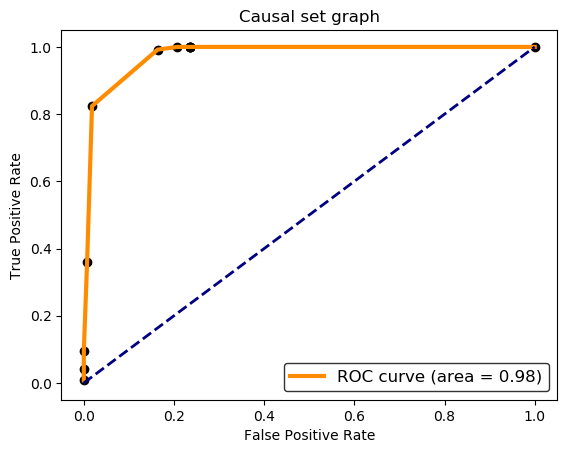

In [11]:
# evaluate over several random causal set graphs
causal_graph_scores = []
N = 20
for i in range(20):
    G = causal_set_graph(N, 2)
    embed = MinkowskiEmbedding(n_components=2) 
    X = embed.fit(G)
    causal_graph_scores.append(roc_auc_score(G, X))

# plot roc curve
plot_roc_curve(G, X, title='Causal set graph')
sensitivity(G, embed.predict(G))
specificity(G, embed.predict(G))
roc_auc_score(G, X);

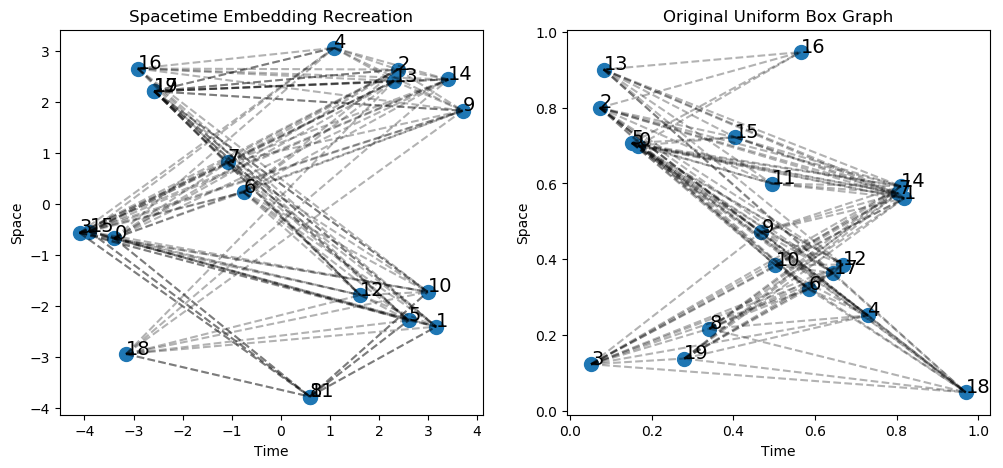

In [12]:
# evaluate on uniform box graph
N = 20
G = uniform_box_graph(N, 2)
embed = MinkowskiEmbedding(n_components=2) 
X = embed.fit(G)
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Spacetime Embedding Recreation')
plt.xlabel('Time')
plt.ylabel('Space')
plt.scatter(X[:, 0], X[:, 1], s=100)
for i in range(N):
    _ = plt.text(X[i, 0], X[i, 1], str(i), size=14);
for u,v in add_edges(X):
    _ = plt.plot([X[u][0], X[v][0]], [X[u][1], X[v][1]], c='black', alpha=0.3, linestyle='--');
plt.subplot(122)
plt.title('Original Uniform Box Graph')
plt.xlabel('Time')
plt.ylabel('Space')
X_orig = np.array([G.node[i]['position'] for i in range(N)])
plt.scatter(X_orig[:, 0], X_orig[:, 1], s=100)
for i in range(N):
    _ = plt.text(X_orig[i, 0], X_orig[i, 1], str(i), size=14);
for u,v in list(G.edges()):
    _ = plt.plot([X_orig[u][0], X_orig[v][0]], [X_orig[u][1], X_orig[v][1]], 
                 c='black', alpha=0.3, linestyle='--');
plt.show();

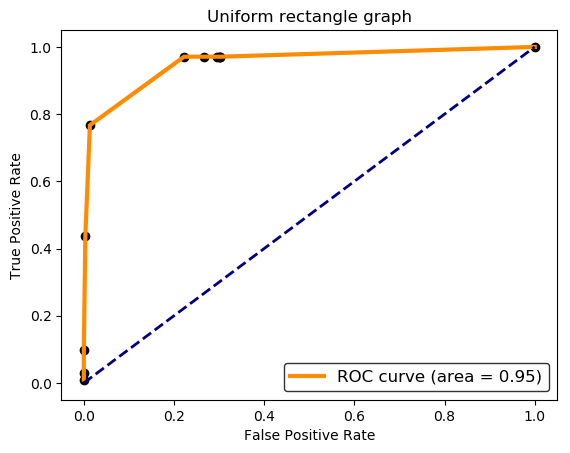

In [13]:
# evaluate over several random causal set graphs
box_graph_scores = []
N = 20
for i in range(20):
    G = causal_set_graph(N, 2)
    embed = MinkowskiEmbedding(n_components=2) 
    X = embed.fit(G)
    box_graph_scores.append(roc_auc_score(G, X))

# plot roc curve
plot_roc_curve(G, X, title='Uniform rectangle graph')
sensitivity(G, embed.predict(G))
specificity(G, embed.predict(G))
roc_auc_score(G, X);

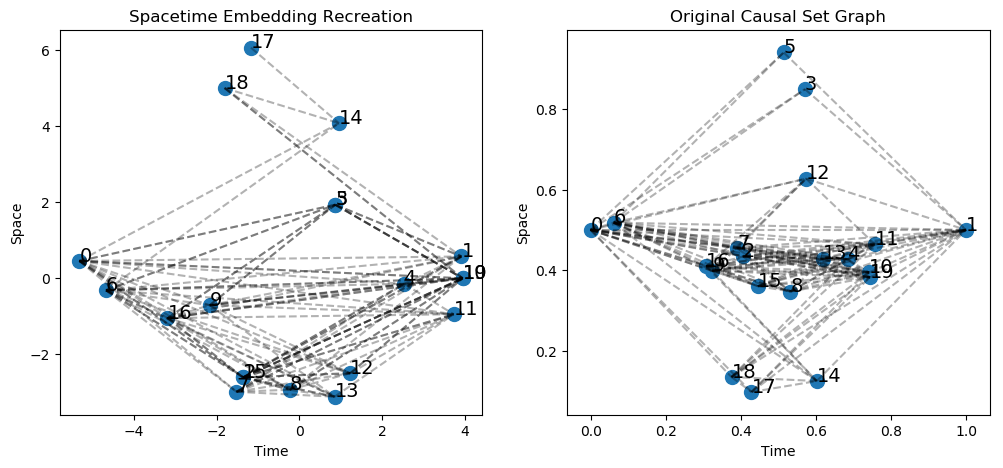

In [10]:
# evaluate on causal set graph
from dag_embed import MinkowskiEmbedding
N = 20
G = causal_set_graph(N, 2)
embed = MinkowskiEmbedding(n_components=2) 
X = embed.fit(G)
plt.figure(figsize=(12,5))
plt.style.use('default')
plt.subplot(121)
plt.title('Spacetime Embedding Recreation')
plt.xlabel('Time')
plt.ylabel('Space')
plt.scatter(X[:, 0], X[:, 1], s=100)
for i in range(N):
    _ = plt.text(X[i, 0], X[i, 1], str(i), size=14);
for u,v in add_edges(X):
    _ = plt.plot([X[u][0], X[v][0]], [X[u][1], X[v][1]], c='black', linestyle='--', alpha=0.3);
plt.subplot(122)
plt.title('Original Causal Set Graph')
plt.xlabel('Time')
plt.ylabel('Space')
X_orig = np.array([G.node[i]['position'] for i in range(N)])
plt.scatter(X_orig[:, 0], X_orig[:, 1], s=100)
for i in range(N):
    _ = plt.text(X_orig[i, 0], X_orig[i, 1], str(i), size=14);
for u,v in list(G.edges()):
    _ = plt.plot([X_orig[u][0], X_orig[v][0]], [X_orig[u][1], X_orig[v][1]], 
                 alpha=0.3, c='black', linestyle='--');
plt.show();

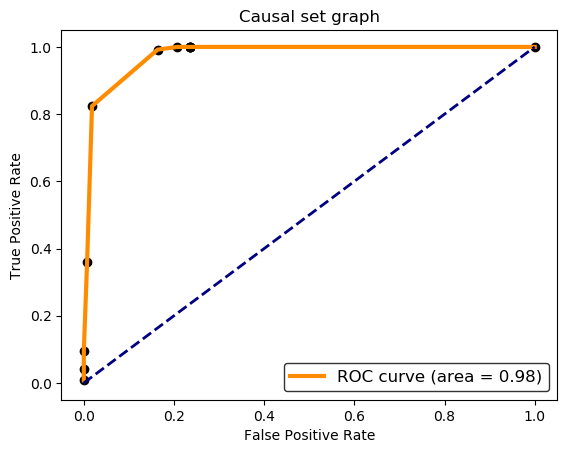

In [11]:
# evaluate over several random causal set graphs
causal_graph_scores = []
N = 20
for i in range(20):
    G = causal_set_graph(N, 2)
    embed = MinkowskiEmbedding(n_components=2) 
    X = embed.fit(G)
    causal_graph_scores.append(roc_auc_score(G, X))

# plot roc curve
plot_roc_curve(G, X, title='Causal set graph')
sensitivity(G, embed.predict(G))
specificity(G, embed.predict(G))
roc_auc_score(G, X);

In [56]:
G_er = nx.erdos_renyi_graph(20, 0.1, seed=None, directed=True)
G_er.nodes()
len(list(G_er.edges()))

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19))

37

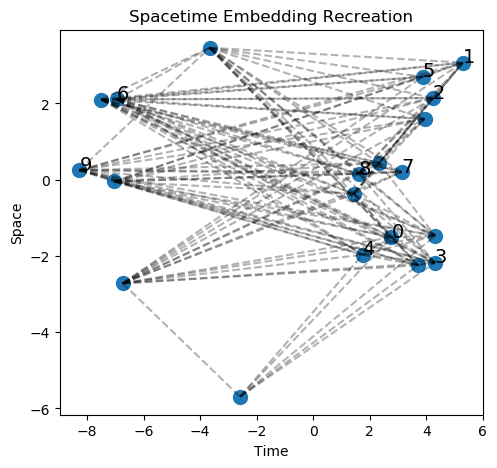

In [57]:
N = 10
G = G_er
embed = MinkowskiEmbedding(n_components=2) 
X = embed.fit(G)
plt.figure(figsize=(12,5))
plt.style.use('default')
plt.subplot(121)
plt.title('Spacetime Embedding Recreation')
plt.xlabel('Time')
plt.ylabel('Space')
plt.scatter(X[:, 0], X[:, 1], s=100)
for i in range(N):
    _ = plt.text(X[i, 0], X[i, 1], str(i), size=14);
for u,v in add_edges(X):
    _ = plt.plot([X[u][0], X[v][0]], [X[u][1], X[v][1]], c='black', linestyle='--', alpha=0.3);
plt.show();

In [ ]:
# evaluate over several random causal set graphs
random_dag_scores = []
N = 20
for i in range(20):
    G = nx.erdos_renyi_graph(20, p=0.5, seed=None, directed=True)
    embed = MinkowskiEmbedding(n_components=2) 
    X = embed.fit(G)
    random_dag_scores.append(roc_auc_score(G, X))

# plot roc curve
plot_roc_curve(G, X, title='Causal set graph')
sensitivity(G, embed.predict(G))
specificity(G, embed.predict(G))
roc_auc_score(G, X);

In [37]:
from random import randrange
def random_dag(degree_sequence):
    """ Create a random DAG from a given degree sequence
    
    Parameters
    ----------
    
    degree_sequence - list of pairs of in, out degrees
    all edges go from earlier to later in this list
    
    Returns
    -------
    
    NetworkX DiGraph
    """
    G = nx.DiGraph()
    G.add_nodes_from(range(len(degree_sequence)))
    remaining_stubs = [] # list of forward pointing stubs
    for node, degrees in enumerate(degree_sequence):
        indegree, outdegree = degrees
        allowed_stubs = remaining_stubs[:]
        for x in range(indegree):
            if len(allowed_stubs) == 0:
                # raise networkx error
                assert False, 'Not a valid degree sequence'
            older_node = allowed_stubs.pop(randrange(len(allowed_stubs)))
            remaining_stubs.remove(older_node)
            # be careful about multiedges
            allowed_stubs = [x for x in allowed_stubs if x != older_node]
            G.add_edge(older_node, node)
        for x in range(outdegree):
            remaining_stubs.append(node)
    return G

In [40]:
#rand_G = random_dag([[0, 2], [0, 2], [2, 0], [2, 0]])


AssertionError: Not a valid degree sequence

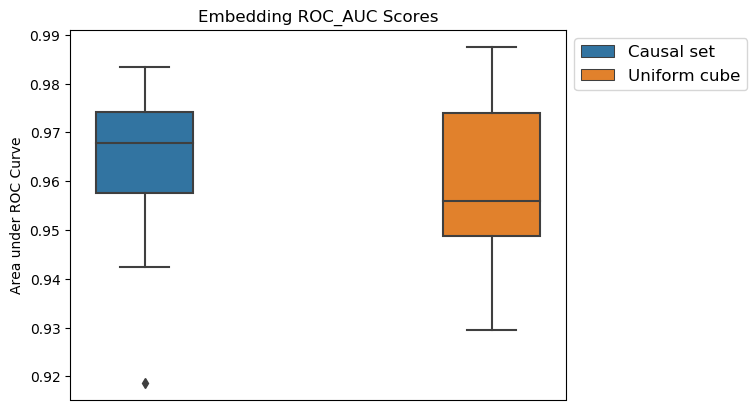

In [30]:
import pandas as pd
test_data = list(np.repeat(0, len(causal_graph_scores))) + list(np.repeat(1, len(box_graph_scores)))
test_scores = list(causal_graph_scores) + list(box_graph_scores)
test_labels = list(np.repeat('Causal set', len(causal_graph_scores))) + list(np.repeat('Uniform_cube_graph', len(box_graph_scores)))
result_df = pd.DataFrame(np.hstack((np.array(test_data).reshape(-1,1), np.array(test_scores).reshape(-1,1))),
                        columns=['dataset', 'roc_auc'])
ax = sns.boxplot(data=result_df, x='dataset', y='roc_auc', hue="dataset");
plt.title('Embedding ROC_AUC Scores')
plt.ylabel('Area under ROC Curve')
plt.xlabel(None)
plt.xticks([])
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["Causal set", "Uniform cube"], fontsize=12, loc='upper left', bbox_to_anchor=(1, 1));